# Big Mart Sales prediction

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data = pd.read_csv(r"D:\DataSets\Kaggle_Big_Mart\train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
data.shape

(8523, 12)

In [33]:
for col in data.columns:
    print(f"the {col} column has {data[col].nunique()} unique values")

the Item_Identifier column has 1559 unique values
the Item_Weight column has 415 unique values
the Item_Fat_Content column has 5 unique values
the Item_Visibility column has 7880 unique values
the Item_Type column has 16 unique values
the Item_MRP column has 5938 unique values
the Outlet_Identifier column has 10 unique values
the Outlet_Establishment_Year column has 9 unique values
the Outlet_Size column has 3 unique values
the Outlet_Location_Type column has 3 unique values
the Outlet_Type column has 4 unique values
the Item_Outlet_Sales column has 3493 unique values


In [34]:
numeric_col = [col for col in data.columns if data[col].dtype != 'object']
object_col = [col for col in data.columns if data[col].dtype == 'object']

In [35]:
cat_col = []
for col in object_col:
    if data[col].nunique() <= 16:
        data[col] = data[col].astype('category')
        cat_col.append(col)
        object_col.remove(col)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(3), float64(4), int64(1), object(4)
memory usage: 625.1+ KB


In [37]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
def encodeur_decodeur(categories: list):
    encode_decode = {}
    for cat in categories:
        encodeur = {key: value for value, key in enumerate(data[cat].unique())}
        decodeur = {encodeur[key]: key for key in encodeur}
        encode_decode[cat] = (encodeur, decodeur)
    return encode_decode


### Data Dictionary
Now have an idea of the compositon of our data set we can ask ourselves what each variable tell us what's its purpose

    - Item_Identifier:
        unique item identifier
    - Item_Weight:
        weight of the item in kilogram, quantitative variable
    - Item_Fat_Content:
        the fat quantity contained by the item grouped in 5 categories
    - Item_Visibility:
        quantitative variable indicating the visibility of an Item (arbitrary unit?)
    -Item_Type:
        category indicating the item type
    -Item_MRP:
        Maximum Retail Price of the item 
    - Outlet_Identifer:
        unique outlet identifier
    - Outlet_Establishment_Year:
    - Outlet_size:
        category representing the size of the outlet
    - Outlet_Location_Type:
        category representing the location type of the outlet
    - Item_Outlet_Sales (target value):
        total revenue for the item for a given outlet

## 1./ Data Cleaning

#### 1.1/ Missing Values

two columns with missing values : Item_Weight and Outlet_Size
let's see how we can handle them.

Item_Weight:

    - Impute the mean
    - Impute the mean with a random value within std
    - see if there are covariant and impute the grouped by mean (+- a random value within std)

Outlet_Size:

    - check with the identifier if the outlet size for this specific outlet appear in another row
    - Impute the mode
    - see if there are covariant and impute grouped by mode


##### 1.1.1/ Handling Item_Weight null values

In [39]:
print(f"""Item weight mean: {data['Item_Weight'].mean()},
Item weight median: {data['Item_Weight'].median()}
Item weight std: {data['Item_Weight'].std()}""")

Item weight mean: 12.857645184135976,
Item weight median: 12.6
Item weight std: 4.643456499186395


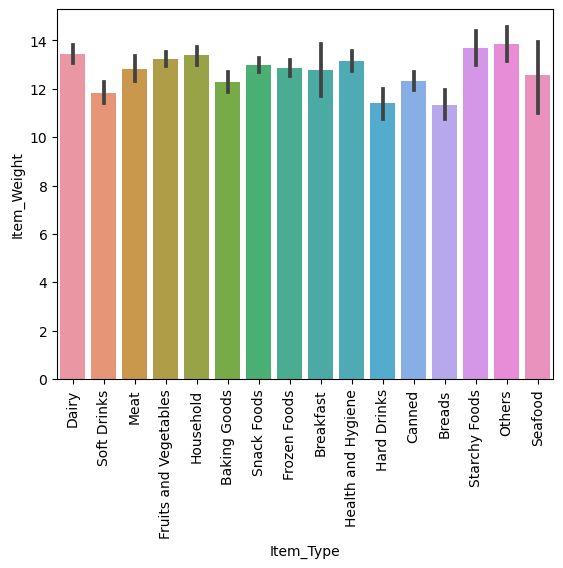

In [40]:
sns.barplot(data=data, x='Item_Type', y='Item_Weight')
plt.xticks(rotation = 90)
plt.show()

c:\Users\Daz\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


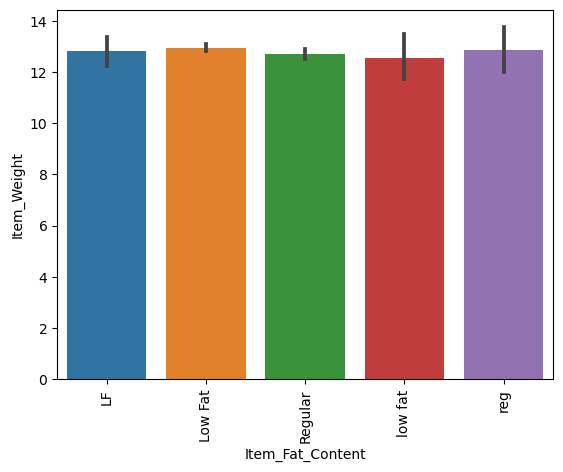

In [41]:
sns.barplot(data=data, x='Item_Fat_Content', y='Item_Weight')
plt.xticks(rotation=90)
plt.show()

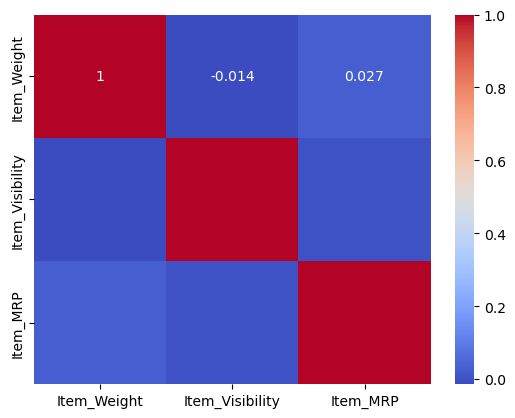

In [42]:
sns.heatmap(data[['Item_Weight', 'Item_Visibility', 'Item_MRP']].corr(), cmap='coolwarm', annot=True)
plt.show()

The mean weight for each item fat content seem equal and both visibility and mrp have no correlation with weight.
The only item related variable seeming to have an significative difference in weight between category is Item_Type.

Let's how weight vary between each types.

In [43]:
Item_Weight_by_Type =  data.groupby('Item_Type')['Item_Weight']
Item_Weight_by_Type.agg(['mean', 'median', 'std'])

,mean,median,std
Item_Type,,,
Baking Goods,12.277108,11.650,4.773622
Breads,11.346936,10.600,4.440540
Breakfast,12.768202,10.695,5.038131
Canned,12.305705,12.150,4.586564
Dairy,13.426069,13.350,4.686532
Frozen Foods,12.867061,12.850,4.507383
Fruits and Vegetables,13.224769,13.100,4.575275
Hard Drinks,11.400328,10.100,4.239144
Health and Hygiene,13.142314,12.150,4.512313


<Axes: xlabel='Item_Weight', ylabel='Item_Type'>

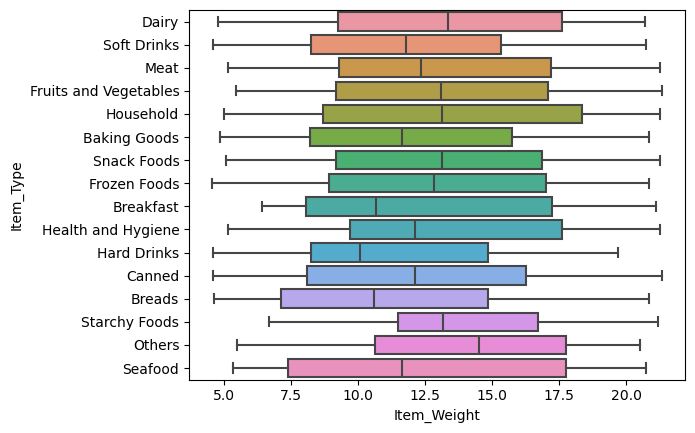

In [44]:
# should we impute the mean or the median what's more significative
sns.boxplot(data=data, x='Item_Weight', y='Item_Type')

The global mean could easily be imputed as it does not differ so much from the grouped by type mean.
But for the sake of practice let's do it

In [45]:
data['Item_Weight'] = data['Item_Weight'].fillna(Item_Weight_by_Type.transform('mean'))
print(data['Item_Weight'].isna().sum())

0


##### 1.1.2/ Handling Outlet_Size missing values

In [46]:
size_missing_outlet = data[data['Outlet_Size'].isna()]['Outlet_Identifier'].unique()
len(data[(data['Outlet_Identifier'].isin(size_missing_outlet)) & (~data['Outlet_Size'].isna())])

0

In [47]:
gb_outlet = data.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].value_counts()

C:\Users\Daz\AppData\Local\Temp\ipykernel_13720\4133846377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_outlet = data.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].value_counts()


In [48]:
gb_outlet

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
                                         High             0
                                         Medium           0
                   Tier 2                Small            0
                                         Medium           0
                                         High             0
                   Tier 3                Small            0
                                         Medium           0
                                         High             0
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                                         High             0
                   Tier 2                Small          930
                                         Medium           0
                                         High             0
                   Tier 3                High  

In [49]:
data[(data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Size'].isna())]['Outlet_Location_Type'].unique()

['Tier 2']
Categories (3, object): ['Tier 1', 'Tier 2', 'Tier 3']

In [56]:
def impute_outlet_size(type, loc_type):
    if type == 'Grocery Store':
        return 'Small'
    elif type in ['Supermarket Type2', 'Supermarket Type3']:
        return 'Medium'
    elif type == 'Supermarket Type1':
        # Condition not working but why ???
        if loc_type == 'Tier 2':
            return 'Small'
        elif loc_type == 'Tier 3':
            return 'High'
        elif loc_type == 'Tier 1':
            n = np.random.randint(0, 2)
            sizes = ['Medium', 'High']
            return sizes[n]
        else:
            print(loc_type)
            return 'condition not met in loc_type'

    else:
        'condition not met in type'

data.loc[data['Outlet_Size'].isna(), 'Outlet_Size'] = data.loc[data['Outlet_Size'].isna(), 'Outlet_Type'].apply(impute_outlet_size, args=(data['Outlet_Location_Type'],))
data[data['Outlet_Size'].isna()]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Daz\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Daz\AppData\Local\Temp\ipykernel_13720\863935885.py", line 23, in <module>
    data.loc[data['Outlet_Size'].isna(), 'Outlet_Size'] = data.loc[data['Outlet_Size'].isna(), 'Outlet_Type'].apply(impute_outlet_size, args=(data['Outlet_Location_Type'],))
                                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\series.py", line 4764, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1209, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1289, in

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Daz\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Daz\AppData\Local\Temp\ipykernel_13720\2093250292.py", line 1, in <module>
    data.loc[data['Outlet_Size'].isna(), 'Outlet_Size'] = data.loc[data['Outlet_Size'].isna(), 'Outlet_Type'].apply(impute_outlet_size, args=(data['Outlet_Location_Type'],))
                                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\series.py", line 4764, in apply
    ).apply()
      ^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1209, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Daz\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1289, in

In [52]:
data.loc[data['Outlet_Size'].str.contains('condition'), 'Outlet_Size'] = 'Small'

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
data[data['Outlet_Type'] == 'Supermarket Type1']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


#### 1.2/ Replacing inconsistent values

##### 1.2.1/ Item_Fat_Content
as we can see there are inconsistent values in the Item_Fat_Content column such as LF for Low Fat or reg for Regular

In [ ]:
fat_content_cat = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
data['Item_Fat_Content'].replace(fat_content_cat, inplace=True)

In [ ]:
data['Item_Fat_Content'].unique()

['Low Fat', 'Regular']
Categories (2, object): ['Low Fat', 'Regular']

In [ ]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2./ EDA

What variable have the most impact on Item_Outlet_Sales

In [ ]:
data[numeric_col].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


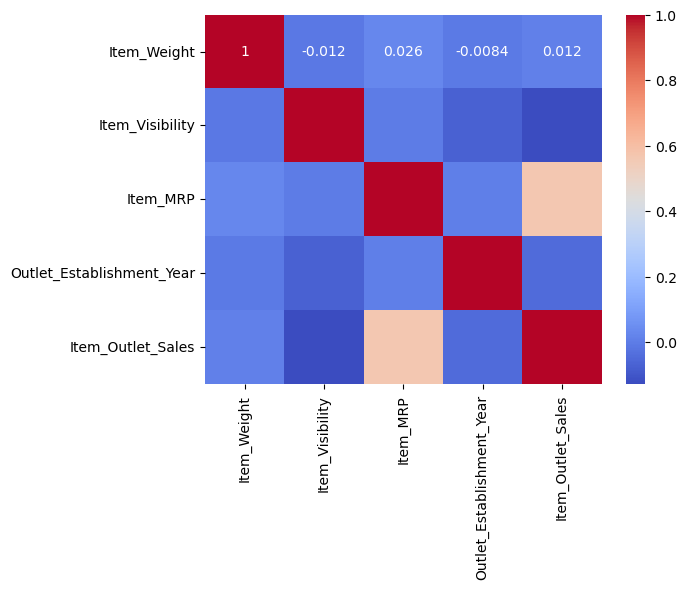

In [ ]:
sns.heatmap(data=data[numeric_col].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

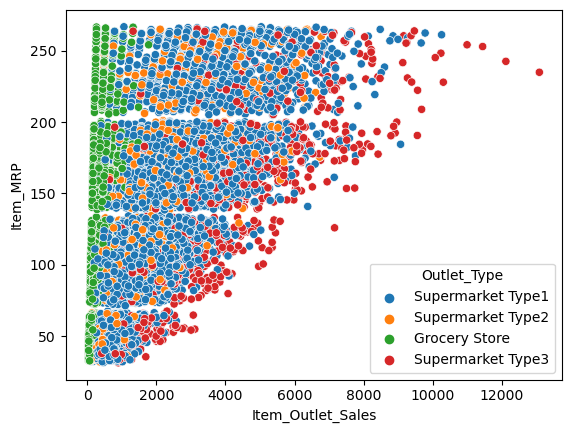

In [ ]:
sns.scatterplot(data=data, x='Item_Outlet_Sales', y='Item_MRP', hue='Outlet_Type')

## 3./ Model

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#enc = OneHotEncoder()

#data_processed = 

In [ ]:
feature = numeric_col
target = feature[-1]
feature = feature[:-1]
feature
target

'Item_Outlet_Sales'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data[feature], data[target], test_size=0.3, train_size=0.7)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = 'Item_Outlet_Sales~' + '+'.join(feature)
formula

'Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP+Outlet_Establishment_Year'

In [ ]:
smf.ols(formula=formula, data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1108.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:23:38   Log-Likelihood:                -73737.
No. Observations:                8523   AIC:                         1.475e+05
Df Residuals:                    8518   BIC:                         1.475e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.553e+04   3590.854      7.109      0.000    1.85e+04    3.26e+04
Item_Weight                  -1.8678      3.544     -0.527      0.598      -8.815       5.080
Item_Visibility           -4384.4132    291.450    -15.043      0.000   -4955.726   -3813.101
Item_MRP                     15.5600      0.241     64.600      0.000      15.088      16.032
Outlet_Establishment_Year   -12.6268      1.796     -7.029      0.000     -16.148      -9.106
==============================================================================
Omnibus:                      674.762   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.928
Skew:                           0.525   Prob(JB):                    1.38e-305
Kurtosis:                       4.688   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
linear_model.LinearRegression().fit(X_train, Y_train)

LinearRegression()